In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv('student-mat.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Checking for null cells...

df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
cols_to_remove = []

for col in df.columns:
    try:
        _ = df[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
features = df[[col for col in df.columns if col not in cols_to_remove]]

Couldn't covert school to float
Couldn't covert sex to float
Couldn't covert address to float
Couldn't covert famsize to float
Couldn't covert Pstatus to float
Couldn't covert Mjob to float
Couldn't covert Fjob to float
Couldn't covert reason to float
Couldn't covert guardian to float
Couldn't covert schoolsup to float
Couldn't covert famsup to float
Couldn't covert paid to float
Couldn't covert activities to float
Couldn't covert nursery to float
Couldn't covert higher to float
Couldn't covert internet to float
Couldn't covert romantic to float


In [6]:
features['sex'] = 0
features['Mjob'] = 0
features['Fjob'] = 0
features['guardian'] = 0
features['schoolsup'] = 0
features['famsup'] = 0
features['paid'] = 0
features['activities'] = 0
features['nursery'] = 0

features.loc[(df['sex'] == 'male'), 'sex'] = 1
features.loc[(df['Mjob'] == 'other'), 'Mjob'] = 1
features.loc[(df['Mjob'] == 'service'), 'Mjob'] = 2
features.loc[(df['Mjob'] == 'health'), 'Mjob'] = 3
features.loc[(df['Mjob'] == 'teacher'), 'Mjob'] = 4
features.loc[(df['Fjob'] == 'other'), 'Fjob'] = 1
features.loc[(df['Fjob'] == 'service'), 'Fjob'] = 2
features.loc[(df['Fjob'] == 'health'), 'Fjob'] = 3
features.loc[(df['Fjob'] == 'teacher'), 'Fjob'] = 4
features.loc[(df['guardian'] == 'father'), 'guardian'] = 1
features.loc[(df['guardian'] == 'other'), 'guardian'] = 2
features.loc[(df['schoolsup'] == 'yes'), 'schoolsup'] = 1
features.loc[(df['famsup'] == 'yes'), 'famsup'] = 1
features.loc[(df['paid'] == 'yes'), 'paid'] = 1
features.loc[(df['activities'] == 'yes'), 'activities'] = 1
features.loc[(df['nursery'] == 'yes'), 'nursery'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [7]:
G3 = features[['G3']]

G3['G3'] = 0
G3.loc[(features['G3'] > 5), 'G3'] = 1

features = features.drop('G3', 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
features.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G2,sex,Mjob,Fjob,guardian,schoolsup,famsup,paid,activities,nursery
0,18,4,4,2,2,0,4,3,4,1,...,6,0,0,4,0,1,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,5,0,0,1,1,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,8,0,0,1,0,1,0,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,14,0,3,0,0,0,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,10,0,1,1,1,0,1,1,0,1


In [9]:
G3.head()

,G3
0,1
1,1
2,1
3,1
4,1


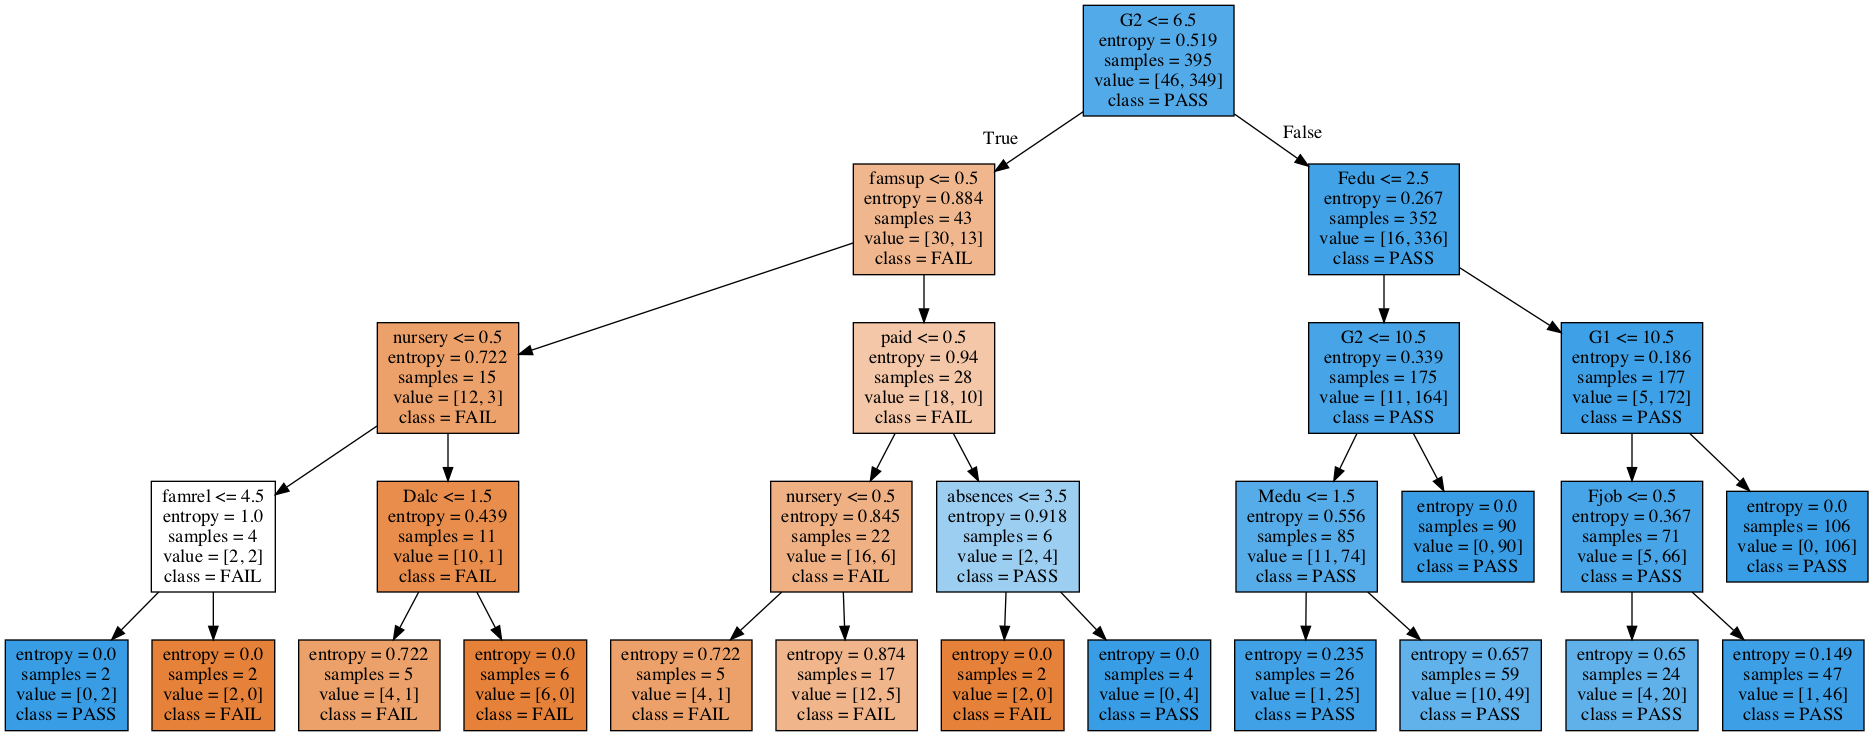

In [10]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4,
)
decision_tree.fit(features, G3)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features.columns,
    class_names=['FAIL', 'PASS'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# import time
# start_time = time.time()
# main()
# print("--- %s seconds ---" % (time.time() - start_time))

In [17]:
import time
start_time = time.time()
# main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.125999450683594e-05 seconds ---
